In [1]:
# wandbai api key: e6b43dd118f9a14e83fe12c597ad8d06bdfed432

In [10]:
!pip install wandb --upgrade

In [4]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

In [5]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: da24s016 (da24s016-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [7]:
axes.shape

(10,)

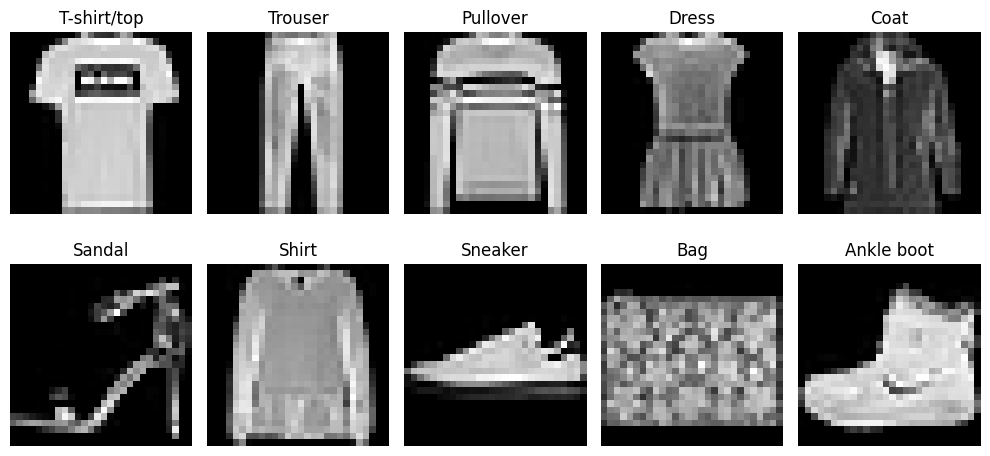

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure and axes for the plot
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through each class
for i in range(10):
  # Find the index of the first image of the current class
  index = np.where(train_labels == i)[0][0]
  # Plot the image on the corresponding subplot
  row = i // 5
  col = i % 5
  axes[row, col].imshow(train_images[index], cmap='gray')
  axes[row, col].set_title(class_names[i])
  axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
# import wandb
# import random

# # start a new wandb run to track this script
# wandb.init(
#     # set the wandb project where this run will be logged
#     project="my-awesome-project",

#     # track hyperparameters and run metadata
#     config={
#     "learning_rate": 0.02,
#     "architecture": "CNN",
#     "dataset": "CIFAR-100",
#     "epochs": 10,
#     }
# )

# # simulate training
# epochs = 10
# offset = random.random() / 5
# for epoch in range(2, epochs):
#     acc = 1 - 2 ** -epoch - random.random() / epoch - offset
#     loss = 2 ** -epoch + random.random() / epoch + offset

#     # log metrics to wandb
#     wandb.log({"acc": acc, "loss": loss})

# # [optional] finish the wandb run, necessary in notebooks
# wandb.finish()

acc,▂▁▄▇▇▇▇█
loss,██▆▂▄▁▃▃
acc,0.88677
loss,0.20002


In [11]:
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [12]:
train_images.shape[0]

60000

In [15]:
ix = np.random.randint(0, train_images.shape[0], (32,))
ix

array([25555, 55721, 26233, 48694, 29303, 42607, 25452, 25376, 33001,
       42150, 45173, 44841, 54301, 40152, 55834, 25220, 41755, 32703,
       24984, 24125,  4506, 30705, 40089,  9948, 35342, 12695, 10689,
       50818, 20546, 26677, 49592, 34023])

In [17]:
train_images[ix].shape

(32, 28, 28)

In [71]:
def one_hot(y, num_classes=10):
  return np.eye(num_classes)[y]

In [60]:
# Defining the neural network
class neural_network:
    def __init__(self, input_size, output_size, hidden_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size

        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.random.randn((self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.hidden_size)
        self.b2 = np.random.randn((self.hidden_size))
        self.W3 = np.random.randn(self.hidden_size, self.output_size)
        self.b3 = np.random.randn((self.output_size))

        self.SdW1 = 0
        self.Sdb1 = 0
        self.SdW2 = 0
        self.Sdb2 = 0
        self.SdW3 = 0
        self.Sdb3 = 0

        self.a1 = 0
        self.a2 = 0
        self.z1 = 0
        self.z2 = 0
        self.z3 = 0

        self.output = 0

        self.eps = 1e-8

    def sigmoid(self, s):
        return 1/(1+np.exp(-s))

    def __call__(self, X):
        return self.forward(X)


    def sigmoid_derivative(self, s):
        return s * (1 - s)

    def forward(self, X):
        #B is batch size below
        self.z1 = X@self.W1 + self.b1.  #(B, 784)@(784, 128) + (B, 128) #Broadcasting
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1@self.W2 + self.b2  #(B, 128)@(128, 128) + (B, 128) #Broadcasting
        self.a2 = self.sigmoid(self.z2)
        self.z3 = self.a2@self.W3 + self.b3 #(B, 128)@(128, 10) + (B, 10) #Broadcasting
        self.output = self.sigmoid(self.z3)
        return self.output

    """Implementing backpropagation"""
    def backward(self, X, y_true):
        #backward pass
        m, n = X.shape
        delta = self.forward(X) - one_hot(y_true)
        delta2 = np.dot(delta, self.W3.T) * self.sigmoid_derivative(self.a2)
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)

        # Calculate the gradient
        dW3 = np.dot(self.a2.T, delta)
        db3 = np.sum(delta, axis=0, keepdims=True)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        dW1 = np.dot(X.T.reshape(n,m), delta1)
        db1 = np.sum(delta1, axis=0)

        return dW1, db1, dW2, db2, dW3, db3

    """Implementing Cross-Entropy Loss"""
    def cross_entropy_loss(self, y_true, y_pred, epsilon=1e-12):

        n = len(y_true)
        log_y_pred = np.log(y_pred)
        return np.mean(y_pred[range(n), y_true])




    """Implementing SGD optimizer to update the weights"""
    def sgd_optimizer(self, X, y_true, lr, gamma, batch_size):
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y_true[i:i+batch_size]
            dW1, db1, dW2, db2, dW3, db3 = self.backward(X_batch, y_batch)
            self.W1 = self.W1 - lr*dW1 - gamma*self.W1
            self.b1 = self.b1 - lr*db1
            self.W2 = self.W2 - lr*dW2 - gamma*self.W2
            self.b2 = self.b2 - lr*db2
            self.W3 = self.W3 - lr*dW3 - gamma*self.W3
            self.b3 = self.b3 - lr*db3
    """Implementing RMSProp optimizer to update the weights"""
    def rms_prop(self,X,y_true,learning_rate,decay_rate):
        y_pred = self.forward(X)
        dW1, db1, dW2, db2, dW3, db3 = self.backward(X, y_true)
        self.SdW1 = decay_rate * self.SdW1 + (1 - decay_rate) * np.power(dW1, 2)
        self.Sdb1 = decay_rate * self.Sdb1 + (1 - decay_rate) * np.power(db1, 2)
        self.SdW2 = decay_rate * self.SdW2 + (1 - decay_rate) * np.power(dW2, 2)
        self.Sdb2 = decay_rate * self.Sdb2 + (1 - decay_rate) * np.power(db2, 2)
        self.SdW3 = decay_rate * self.SdW3 + (1 - decay_rate) * np.power(dW3, 2)
        self.Sdb3 = decay_rate * self.Sdb3 + (1 - decay_rate) * np.power(db3, 2)

        self.W1 -= learning_rate * dW1 / np.sqrt(self.SdW1 + self.eps)
        self.b1 -= learning_rate * db1 / np.sqrt(self.Sdb1 + self.eps)
        self.W2 -= learning_rate * dW2 / np.sqrt(self.SdW2 + self.eps)
        self.b2 -= learning_rate * db2 / np.sqrt(self.Sdb2 + self.eps)
        self.W3 -= learning_rate * dW3 / np.sqrt(self.SdW3 + self.eps)
        self.b3 -= learning_rate * db3 / np.sqrt(self.Sdb3 + self.eps)



In [21]:
28*28

784

In [133]:
x.shape

(32, 784)

In [64]:
y = train_labels[ix]
y

array([5, 9, 2, 5, 0, 9, 5, 7, 1, 3, 0, 2, 4, 0, 2, 8, 9, 3, 6, 0, 6, 7,
       8, 3, 3, 3, 9, 1, 2, 8, 0, 0], dtype=uint8)

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [25]:
x = train_images[ix]

In [31]:
x = x.reshape(x.shape[0], -1)

In [24]:
W1 = np.random.randn(784, 128)
b1 = np.random.randn(128)

In [32]:
W1.shape, b1.shape, x.shape

((784, 128), (128,), (32, 784))

In [34]:
(x@W1 + b1).shape

(32, 128)

In [61]:
nn = neural_network(input_size = 784, output_size = 10, hidden_size = 128)


In [62]:
nn(x).shape

<ipython-input-60-00db751ea613>:33: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-s))


(32, 10)

In [87]:

    # def forward(self, X):
    #     self.z1 = X@self.W1 + self.b1
    #     self.a1 = self.sigmoid(self.z1)
    #     self.z2 = self.a1@self.W2 + self.b2
    #     self.a2 = self.sigmoid(self.z2)
    #     self.z3 = self.a2@self.W3 + self.b3
    #     self.output = self.sigmoid(self.z3)

    #     return self.output


    # def sigmoid_derivative(self, s):
    #     return s * (1 - s)

    # """Implementing backpropagation"""
    # def backward(self, X, y_true):
    #     #backward pass
    #     m,n = X.shape
    #     delta = self.forward(X) - one_hot(y_true)
    #     delta2 = np.dot(delta, self.W3.T) * self.sigmoid_derivative(self.a2)
    #     delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)

    #     # Calculate the gradient
    #     dW3 = np.dot(self.a2.T, delta)
    #     db3 = np.sum(delta, axis=0, keepdims=True)
    #     dW2 = np.dot(self.a1.T, delta2)
    #     db2 = np.sum(delta2, axis=0)
    #     dW1 = np.dot(X.T.reshape(n,m), delta1)
    #     db1 = np.sum(delta1, axis=0)

    #     return dW1, db1, dW2, db2, dW3, db3

In [98]:
W1 = np.random.randn(784, 128)
b1 = np.random.randn(128)
W2 = np.random.randn(128, 128)
b2 = np.random.randn(128)
W3 = np.random.randn(128, 10)
b3 = np.random.randn(10)

In [129]:
layer1 = sigmoid(x@W1+b1)
layer2 = sigmoid(layer1@W2+b2)
layer3 = sigmoid(layer2@W3+b3)
log_layer3 = np.log(layer3)
loss = np.mean(log_layer3[range(32), y])
loss

<ipython-input-97-b9888cdb4a2b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-s))


-4.599040541362687

In [132]:
layer3.shape, layer2.shape, layer1.shape

((32, 10), (32, 128), (32, 128))

In [131]:
#backward pass
dloss = 1

dlog_layer3 = np.zeros_like(log_layer3)
dlog_layer3[range(32), y] = -1/32
dlayer3 = (1/layer3)*dlog_layer3
dlayer2 = dlayer3@W3.T*sigmoid_derivative(layer2)
dlayer1 = dlayer2@W2.T*sigmoid_derivative(layer1)
dW1 = x.T@dlayer1
dW2 = layer1.T@dlayer2
dW3 = layer2.T@dlayer3
db1 = np.sum(dlayer1, axis=0)
db2 = np.sum(dlayer2, axis=0)
db3 = np.sum(dlayer3, axis=0)


In [97]:
def sigmoid(s):
  return 1/(1+np.exp(-s))

def sigmoid_derivative(s):
  return s * (1 - s)

In [101]:
layer3.shape, one_hot(y).shape

((32, 10), (32, 10))

In [110]:
layer3[range(32), y]

array([3.44173950e-08, 5.01599893e-04, 3.03909516e-07, 1.54155767e-08,
       9.59568188e-01, 1.24264990e-02, 9.58859224e-06, 7.27977121e-01,
       9.97435299e-01, 9.76407192e-01, 5.96406075e-01, 1.55512179e-05,
       1.61089121e-10, 7.63385539e-01, 7.19552793e-03, 4.43561181e-01,
       2.08774439e-01, 2.44494539e-01, 2.17139740e-04, 9.99940407e-01,
       1.68440364e-01, 9.88573531e-01, 9.93667802e-01, 1.67240605e-01,
       9.56243992e-01, 9.76800572e-01, 8.29457183e-03, 9.99995542e-01,
       1.37434297e-05, 6.92373607e-01, 2.32254433e-01, 9.70815557e-01])

In [113]:
one_hot(y)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [116]:
loss = 0
for i in range(32):
  loss += one_hot(y)[i]*np.log(layer3[i])

In [128]:
np.sum(loss)/32

-4.599040541362687

In [123]:
log_layer3 = np.log(layer3)
np.sum(log_layer3[range(32), y])

-4.599040541362687

In [127]:
log_layer3[range(32), y].shape

(32,)

In [ ]:
dlog_layer3 = np.zeros_like(log_layer3)
dlog_layer3[range(32), y] = -1/32